In [6]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [10]:
def get_latest_output_dir(strategy, policy_cls):
    output_dir = sorted(glob.glob(f"../records/{strategy}/{policy_cls}/*"))[-1]
    return output_dir


def load_metrics(strategy, policy_cls, scale=1, ann_scaler=252, norm_steps_per_episode=False):
    
    output_dir = get_latest_output_dir(strategy, policy_cls)
    
    df_base = pd.read_csv(f"{output_dir}/baseline/result.csv")
    df_train = pd.read_csv(f"{output_dir}/metrics/train_result.csv", index_col=0)
    df_valid = pd.read_csv(f"{output_dir}/metrics/validation_result.csv", index_col=0)
    df_base = df_base.loc[df_base.index.repeat(len(df_train))].reset_index(drop=True)

    df_base["reward"] = (df_base["reward"] / scale) * ann_scaler
    df_train["reward"] = (df_train["reward"] / scale) * ann_scaler
    df_valid["val/reward"] = (df_valid["val/reward"] / scale) * ann_scaler
    
    if norm_steps_per_episode:
        df_base["reward"] = df_base["reward"] / df_base["steps_per_episode"]
        df_train["reward"] = df_train["reward"] / df_train["steps_per_episode"]
        df_valid["val/reward"] = df_valid["val/reward"] / df_valid["val/steps_per_episode"]
    
    df = pd.DataFrame({
        "baseline": df_base["reward"],
        "train": df_train["reward"],
        "valid": df_valid["val/reward"]
    })
    
    print(f"Loaded metrics from: {output_dir}")
    print(df)
    return df


def plot_metrics(df):
    df.plot(figsize=(10, 6))
    plt.legend(["baseline","train","valid"])
    plt.title("RL Trade Strategy")
    plt.xlabel("Episode")
    plt.ylabel("Reward")

Loaded metrics from: ../records/TopkDropoutStrategy/PPO/2023_03_11_17_55
   baseline     train     valid
0  1.656972  2.575845  1.589774


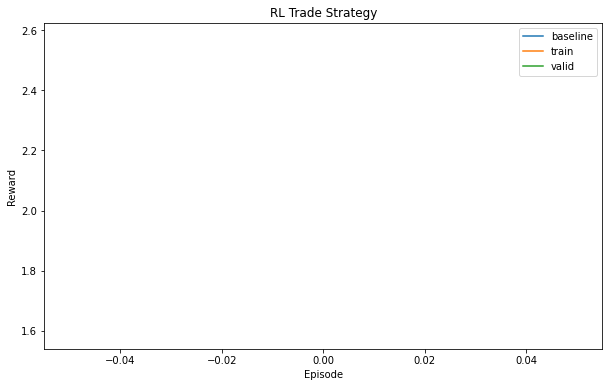

In [12]:
df = load_metrics(
    strategy="TopkDropoutStrategy", 
    policy_cls="PPO", 
    scale=1, 
    ann_scaler=1, 
    norm_steps_per_episode=False
)
plot_metrics(df)